In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df_vor2024 = pd.read_excel("in/Liste AI Wildvögel vor 2024.xlsx")
df_vor2024.columns = [col.split('\n')[0] for col in df_vor2024.columns]
df_vor2024['Fundort'] = df_vor2024['Fundort'].str.replace('\n', ' ')
df_vor2024['Probenahme-Datum'] = pd.to_datetime(df_vor2024['Probenahme-Datum'], format='%d.%m.%Y')
df_vor2024['Ergebnis'] = df_vor2024['Ergebnis'].str.replace('négatif', 'negativ')
df_vor2024['Ergebnis'] = df_vor2024['Ergebnis'].str.replace('positiv ', 'positiv')
df_vor2024['Ergebnis'] = df_vor2024['Ergebnis'].str.replace('Influenza A positiv', 'positiv')
df_vor2024

,Kanton,Fundort,Probenahme-Datum,Vogelart,Status Wildvogel,Ergebnis,Pathogenitaet,Subtyp
0,BE,Neuchâtel,2018-01-03,Cygne tuberculé,"Capturé vivant, blessé",negativ,NaN,NaN
1,ZH,Küsnacht,2018-01-09,Höckerschwan,"Totfund, Einzeltier",negativ,NaN,NaN
2,BE,Wingreis,2018-01-15,Höckerschwan,keine Angabe,negativ,NaN,NaN
3,VD,Yverdon,2018-01-20,Cygne tuberculé,"Trouvé mort, animal isolé",negativ,NaN,NaN
4,BE,Nidau,2018-01-22,Höckerschwan,"Totfund, Einzeltier",negativ,NaN,NaN
...,...,...,...,...,...,...,...,...
898,SH,"Lindli, Rheinhaldenstrasse, 8200 Schaffhausen",2023-12-16,Höckerschwan,Totfund Einzeltier,negativ,NaN,NaN
899,ZH,"Kraftwerk Letten, Staubecken",2023-12-18,Höckerschwan,Lebendfang klinisch krank,negativ,NaN,NaN
900,ZH,mit Schrotkugeln erlöst,2023-12-23,Höckerschwan,Lebendfang klinisch krank,negativ,NaN,NaN
901,ZH,Oerlingen,2023-12-25,Höckerschwan,Totfund Einzeltier,positiv,highly pathogenic avian influenza (HPAI),H5N1


In [23]:
df = pd.read_excel("in/monitoring-wild-birds-avian-influenza.xlsx")
df.columns = [col.split('\n')[0] for col in df.columns]
df['Fundort'] = df['Fundort'].str.replace('\n', ' ')
df['Probenahme-Datum'] = pd.to_datetime(df['Probenahme-Datum'], format='%d.%m.%Y')
df


,Kanton,Fundort,Probenahme-Datum,Vogelart,Status Wildvogel,Ergebnis,Pathogenitaet,Subtyp
0,TG,Hafen Bottighofen 9598 Bottighofen,2024-01-03,Lachmöwe,Totfund mehrere Tiere an einem Ort,negativ,NaN,NaN
1,VD,"Chemin du Signal 8, 1808 Les Monts-de-Corsier",2024-01-08,Haussperling,Totfund Einzeltier,negativ,NaN,NaN
2,FR,"Centre de détention Bellechasse, Bellechasse ...",2024-01-11,Strassentaube,Totfund Einzeltier,negativ,NaN,NaN
3,SG,"Oberstufe, Schülerweg 2 9403 Goldach",2024-01-11,Lachmöwe,Lebendfang verletztes Tier,negativ,NaN,NaN
4,SH,"Kraftwerk Schaffhausen, Rechen Mühlentalstrass...",2024-01-22,Höckerschwan,Totfund Einzeltier,negativ,NaN,NaN
...,...,...,...,...,...,...,...,...
86,BE,"Wasserkraftwerk, Niederried-Radelfingen",2024-12-03,Höckerschwan,Totfund Einzeltier,negativ,NaN,NaN
87,TG,"8273 Ermatingen (Triboltingen, Bodensee)",2024-12-09,Mittelmeermöwe,Tierseuchenverdacht,positiv,highly pathogenic avian influenza (HPAI),H5N1
88,SH,"Furkastieg 4, 8200 Schaffhausen",2024-12-09,Finken,Totfund Einzeltier,negativ,NaN,NaN
89,BE,3272 Walperswil,2024-12-10,Mäusebussard,Totfund Einzeltier,negativ,NaN,NaN


In [24]:
result = pd.concat([df_vor2024, df], ignore_index=True)
result = result.sort_values(by="Probenahme-Datum")
result.to_csv("out/monitoring-wild-birds-avian-influenza.csv", index=False)
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 993
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Kanton            994 non-null    object        
 1   Fundort           966 non-null    object        
 2   Probenahme-Datum  994 non-null    datetime64[ns]
 3   Vogelart          994 non-null    object        
 4   Status Wildvogel  993 non-null    object        
 5   Ergebnis          994 non-null    object        
 6   Pathogenitaet     210 non-null    object        
 7   Subtyp            207 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 69.9+ KB


In [25]:
filtered_df = result.copy()
filtered_df = filtered_df[filtered_df['Probenahme-Datum'] >= "2024-01-01"]
filtered_df = filtered_df[filtered_df['Pathogenitaet'].isin(['highly pathogenic avian influenza (HPAI)']) | filtered_df['Pathogenitaet'].isna()]
filtered_df['Monat'] = filtered_df['Probenahme-Datum'].dt.to_period('M')
grouped = filtered_df.groupby(['Monat', 'Ergebnis']).size().reset_index(name='Anzahl')
grouped['Ergebnis'] = grouped['Ergebnis'].replace('positiv', '1')
grouped['Ergebnis'] = grouped['Ergebnis'].replace('negativ', '2')
grouped.to_csv("out/monitoring-wild-birds-avian-influenza-aggregated-cube.csv", index=False)
grouped

,Monat,Ergebnis,Anzahl
0,2024-01,2,16
1,2024-02,2,9
2,2024-03,2,10
3,2024-04,2,5
4,2024-05,2,6
5,2024-06,2,6
6,2024-07,2,5
7,2024-08,2,11
8,2024-09,2,6
9,2024-10,2,2


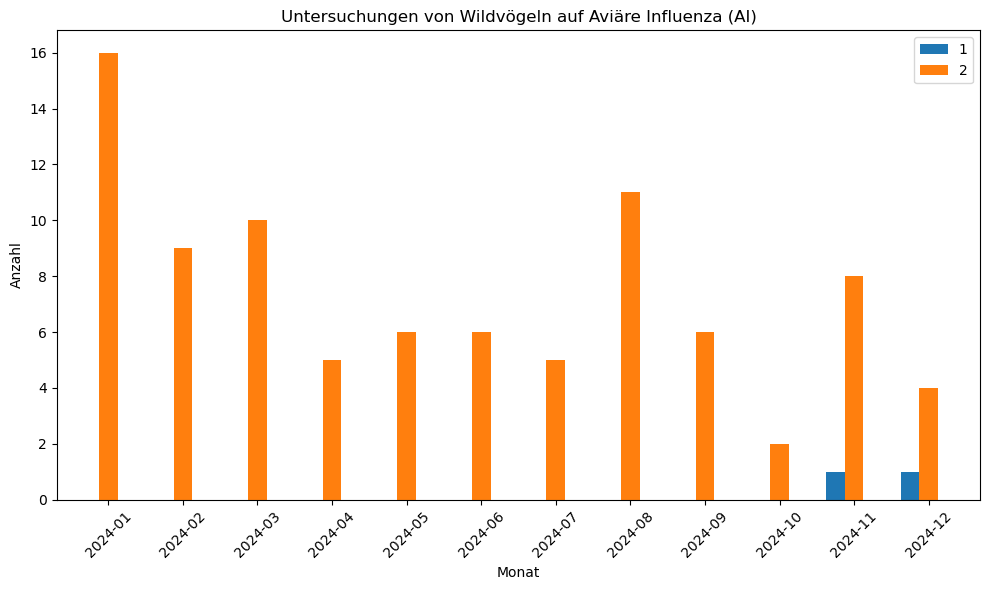

In [26]:
# Pivot-Tabelle erstellen
df_pivot = grouped.pivot(index="Monat", columns="Ergebnis", values="Anzahl")

# Plotting
x = np.arange(len(df_pivot))  # X-Achsen-Positionen basierend auf den Monaten
width = 0.25  # Breite der Balken

fig, ax = plt.subplots(figsize=(10, 6))

# Für jede Ergebnis-Gruppe Balken hinzufügen
for i, column in enumerate(df_pivot.columns):
    ax.bar(x + i * width, df_pivot[column], width, label=column)

# Achsen und Beschriftungen anpassen
ax.set_xlabel("Monat")
ax.set_ylabel("Anzahl")
ax.set_title("Untersuchungen von Wildvögeln auf Aviäre Influenza (AI)")
ax.set_xticks(x + width)  # Zentrieren der xticks
ax.set_xticklabels(df_pivot.index.astype(str), rotation=45)
ax.legend()

# Layout anpassen und anzeigen
plt.tight_layout()

plt.savefig("out/plot.png", dpi=200, bbox_inches="tight")  # DPI und Bounding Box für Qualität

plt.show()

In [27]:
data = {
    'ID': [1,2],
    'DE': ['Anzahl positive HPAI H5N1', 'Anzahl untersuchte Wildvögel'],
    'FR': ['Nombre de résultats positifs HPAI H5N1', 'Nombre d`oiseaux sauvages examinés'],
    'IT': ['Numero di volatici selvatici analizzati', 'Numero di HPAI H5N1 positivi'],
    'EN': ['Number of positive HPAI H5N1', 'Number of wild birds tested']
}

# DataFrame erstellen
df_translation = pd.DataFrame(data)
df_translation.to_csv("out/monitoring-wild-birds-avian-influenza-translation.csv", index=False)
df_translation


,ID,DE,FR,IT,EN
0,1,Anzahl positive HPAI H5N1,Nombre de résultats positifs HPAI H5N1,Numero di volatici selvatici analizzati,Number of positive HPAI H5N1
1,2,Anzahl untersuchte Wildvögel,Nombre d`oiseaux sauvages examinés,Numero di HPAI H5N1 positivi,Number of wild birds tested
